In [1]:
#DIABETES PADA IBU KEHAMILAN
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from warnings import filterwarnings
filterwarnings('ignore')

data = pd.read_csv('diabetess.csv')
data.head(50)

#Jika hasil 1 = diabetes
#Jika hasil 0 = tidak diabetes

,TotalKehamilan,KadarGulaDarah,TekananDarah,KetebalanKulit,Insulin,BMI,KeturunanDiabetes,Umur,Hasil
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [2]:
# Hapus kolom yang tidak digunakan
hapus_kolom = ['TotalKehamilan', 'TekananDarah', 'KetebalanKulit', 'Insulin',  'BMI', 'KeturunanDiabetes']
X = data.drop(hapus_kolom, axis=1)
X.head(50)

,KadarGulaDarah,Umur,Hasil
0,148,50,1
1,85,31,0
2,183,32,1
3,89,21,0
4,137,33,1
5,116,30,0
6,78,26,1
7,115,29,0
8,197,53,1
9,125,54,1


In [3]:
#Total terkena diabetes
hapus_kolom = ['TotalKehamilan', 'TekananDarah', 'KetebalanKulit', 'Insulin', 'BMI', 'KeturunanDiabetes']
diabetes = data[data.Hasil == 1]
diabetes = diabetes.drop(hapus_kolom, axis=1)
diabetes.head(25)

,KadarGulaDarah,Umur,Hasil
0,148,50,1
2,183,32,1
4,137,33,1
6,78,26,1
8,197,53,1
9,125,54,1
11,168,34,1
13,189,59,1
14,166,51,1
15,100,32,1


In [4]:
hapus_kolom = ['TotalKehamilan', 'TekananDarah', 'KetebalanKulit', 'BMI', 'KeturunanDiabetes']
tidak_diabetes = data[data.Hasil == 0]
tidak_diabetes = tidak_diabetes.drop(hapus_kolom, axis=1)
tidak_diabetes.head(25)

,KadarGulaDarah,Insulin,Umur,Hasil
1,85,0,31,0
3,89,94,21,0
5,116,0,30,0
7,115,0,29,0
10,110,0,30,0
12,139,0,57,0
18,103,83,33,0
20,126,235,27,0
21,99,0,50,0
27,97,140,22,0


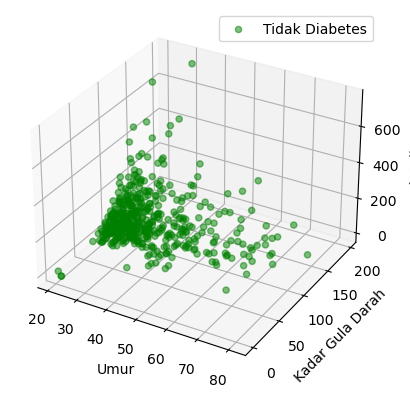

In [22]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# Assuming tidak_diabetes is a DataFrame with columns Umur, KadarGulaDarah, and Insulin
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(tidak_diabetes.Umur, tidak_diabetes.KadarGulaDarah, tidak_diabetes.Insulin, color="green", label="Tidak Diabetes", alpha=0.5)
ax.set_xlabel("Umur")
ax.set_ylabel("Kadar Gula Darah")
ax.set_zlabel("Insulin")

plt.legend()
plt.show()

AttributeError: 'DataFrame' object has no attribute 'Insulin'

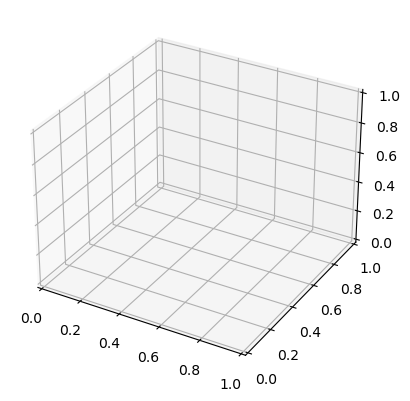

In [19]:
# plt.scatter(diabetes.Umur, diabetes.KadarGulaDarah, color="red",
#             label="Penderita Diabetes",
#             alpha = 0.5)

# plt.xlabel("Umur") 
# plt.ylabel("Kadar Gula Darah") 
# plt.legend() 
# plt.show()

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# Assuming tidak_diabetes is a DataFrame with columns Umur, KadarGulaDarah, and Insulin
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(diabetes.Umur, diabetes.KadarGulaDarah, diabetes.Insulin, color="red", label="Diabetes", alpha=0.5)
ax.set_xlabel("Umur")
ax.set_ylabel("Kadar Gula Darah")
ax.set_zlabel("Insulin")

plt.legend()
plt.show()

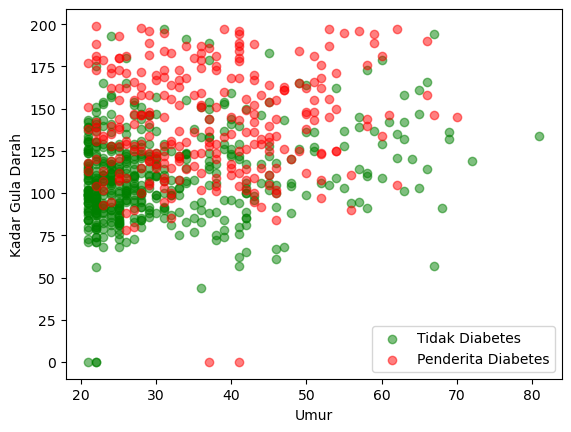

In [20]:
plt.scatter(tidak_diabetes.Umur, tidak_diabetes.KadarGulaDarah, color="green",
            label="Tidak Diabetes",
            alpha = 0.5)

plt.scatter(diabetes.Umur, diabetes.KadarGulaDarah, color="red",
            label="Penderita Diabetes",
            alpha = 0.5)

plt.xlabel("Umur")
plt.ylabel("Kadar Gula Darah")
plt.legend()
plt.show()

In [16]:
# Mengklasifikasikan data uji
y = data.Hasil.values
x_data_mentah = data.drop(["Hasil"],axis=1) 
y[0:50]

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0], dtype=int64)

In [36]:
# Hapus kolom yang tidak digunakan
hapus_kolom = ['TotalKehamilan', 'TekananDarah', 'KetebalanKulit', 'BMI', 'KeturunanDiabetes']
x = data.drop(hapus_kolom, axis=1)

# Ambil data mentah (belum dinormalisasi)
x_data_mentah = x[['Umur', 'KadarGulaDarah', 'Hasil']].values

# Normalisasi hanya pada kolom yang diinginkan menggunakan rumus min-max scaling
x[['Umur', 'KadarGulaDarah', 'Hasil']] = (x_data_mentah - np.min(x_data_mentah, axis=0)) / (np.max(x_data_mentah, axis=0) - np.min(x_data_mentah, axis=0))
print("Data setelah normalisasi:")
x.head(50)

Data setelah normalisasi:


,KadarGulaDarah,Insulin,Umur,Hasil
0,0.743719,0,0.483333,1.0
1,0.427136,0,0.166667,0.0
2,0.919598,0,0.183333,1.0
3,0.447236,94,0.000000,0.0
4,0.688442,168,0.200000,1.0
5,0.582915,0,0.150000,0.0
6,0.391960,88,0.083333,1.0
7,0.577889,0,0.133333,0.0
8,0.989950,543,0.533333,1.0
9,0.628141,0,0.550000,1.0


In [37]:
#Menggunakan 3 tetangga terdekat
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(x_data_mentah,y) 

KNeighborsClassifier(n_neighbors=3)

In [12]:
prediksi = knn.predict(x_data_mentah)
print("K=3 Hasil uji data ", knn.score(x_data_mentah, y))

K=3 Hasil uji data  0.87109375
